# Notebook #1: EDA

In [4]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../../../")
from src import soporte_preprocesamiento as sp

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Como primer paso, cargaremos los tres DFs con los datos:

In [5]:
df = pd.read_pickle("../../../../datos/cluster1/cluster1.pkl")

In [6]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
2,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium


- Vamos a identificar los valores únicos en cada columna:

In [7]:
for columna in df.columns:
    print(columna, df[columna].nunique())

Row ID 32658
Order ID 18879
Order Date 1412
Ship Date 1463
Ship Mode 4
Customer ID 1583
Customer Name 795
Segment 3
City 3331
State 1047
Country 146
Postal Code 576
Market 7
Region 13
Product ID 8000
Category 3
Sub-Category 17
Product Name 3335
Sales 14183
Quantity 14
Discount 26
Profit 14892
Shipping Cost 5751
Order Priority 4


- Respecto a las columnas, si lo que se desea predecir es el beneficio (profit) que va a generar un cliente de acuerdo con sus características, vamos a determinar cuáles pueden ser interesantes para nuestro análisis inicial.

- Aquellas que se corresponden con identificadores que funcionan como etiquetas, en muchos casos únicas, como el *Row ID, Order ID, Order Date, ShipDate, Customer ID, Customer Name, Product ID, Product Name y Shipping Cost*, los eliminaremos del dataset.

- Todas aquellas que, contienen demasiadas categorías y por consecuente, segmentan demasiado los datos, también las eliminaremos. Hablamos de *City, State y Postal Code*.

- Por otra parte, si lo que estamos intentando predecir son las ganancias, la columna ingresos (sales) haría que el modelo se "aprenda" los beneficios, por estar directamente relacionados. También la eliminaremos.

- Por el momento, mantendremos las columnas quantity y discount.

- Aplicamos el filtro y vamos a realizar la exploración del dataframe, pero recordemos antes que estamos trabajando sobre 2 clusters:

> Cluster 0
- Aglomera las ventas de los segmentos Consumer y Corporate, cuyas ventas se centran en tecnología y muebles.

> Cluster 1
- Cubre exclusivamente al segmento de Home Office, aunque participa también de Consumer y Corporate. Su principal categoría de ventas son los suministros de oficina. Genera beneficios que superan en más de 2x los obtenidos por el cluster 1.

______________________________________
- Este EDA corresponde al **cluster 1**.

- Aplicamos el filtro de columnas:

In [8]:
df = df[['Ship Mode', 'Segment', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Order Priority']]

- Y exploramos el conjunto:

In [9]:
sp.exploracion_datos(df)

El número de filas es 32658 y el número de columnas es 11

----------

En este conjunto de datos tenemos 340 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Series([], dtype: float64)


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Quantity,32658.0,3.455876,2.275824,1.000,2.0000,3.00,5.00,14.00
Discount,32658.0,0.137637,0.215772,0.000,0.0000,0.00,0.20,0.80
Profit,32658.0,19.435344,77.658317,-536.448,0.3656,7.14,23.94,809.28



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Ship Mode,32658,4,Standard Class,20730
Segment,32658,3,Consumer,14816
Country,32658,146,United States,6287
Market,32658,7,EU,6685
Region,32658,13,Central,7252
Category,32658,3,Office Supplies,29151
Sub-Category,32658,17,Binders,5731
Order Priority,32658,4,Medium,19811



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 32658 entries, 2 to 50777
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       32658 non-null  object 
 1   Segment         32658 non-null  object 
 2   Country         32658 non-null  object 
 3   Market          32658 non-null  object 
 4   Region          32658 non-null  object 
 5   Category        32658 non-null  object 
 6   Sub-Category    32658 non-null  object 
 7   Quantity        32658 non-null  int64  
 8   Discount        32658 non-null  float64
 9   Profit          32658 non-null  float64
 10  Order Priority  32658 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.0+ MB


None

- Para nuestro conjunto podemos ver que, tenemos 340 valores duplicados. Entendemos que estos han surgido de la eliminación de los IDs, los eliminaremos del conjunto.

- No tenemos datos nulos.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df_num, df_cat = sp.separar_dataframe(df)

- Realizaremos un análisis de las variables numéricas:

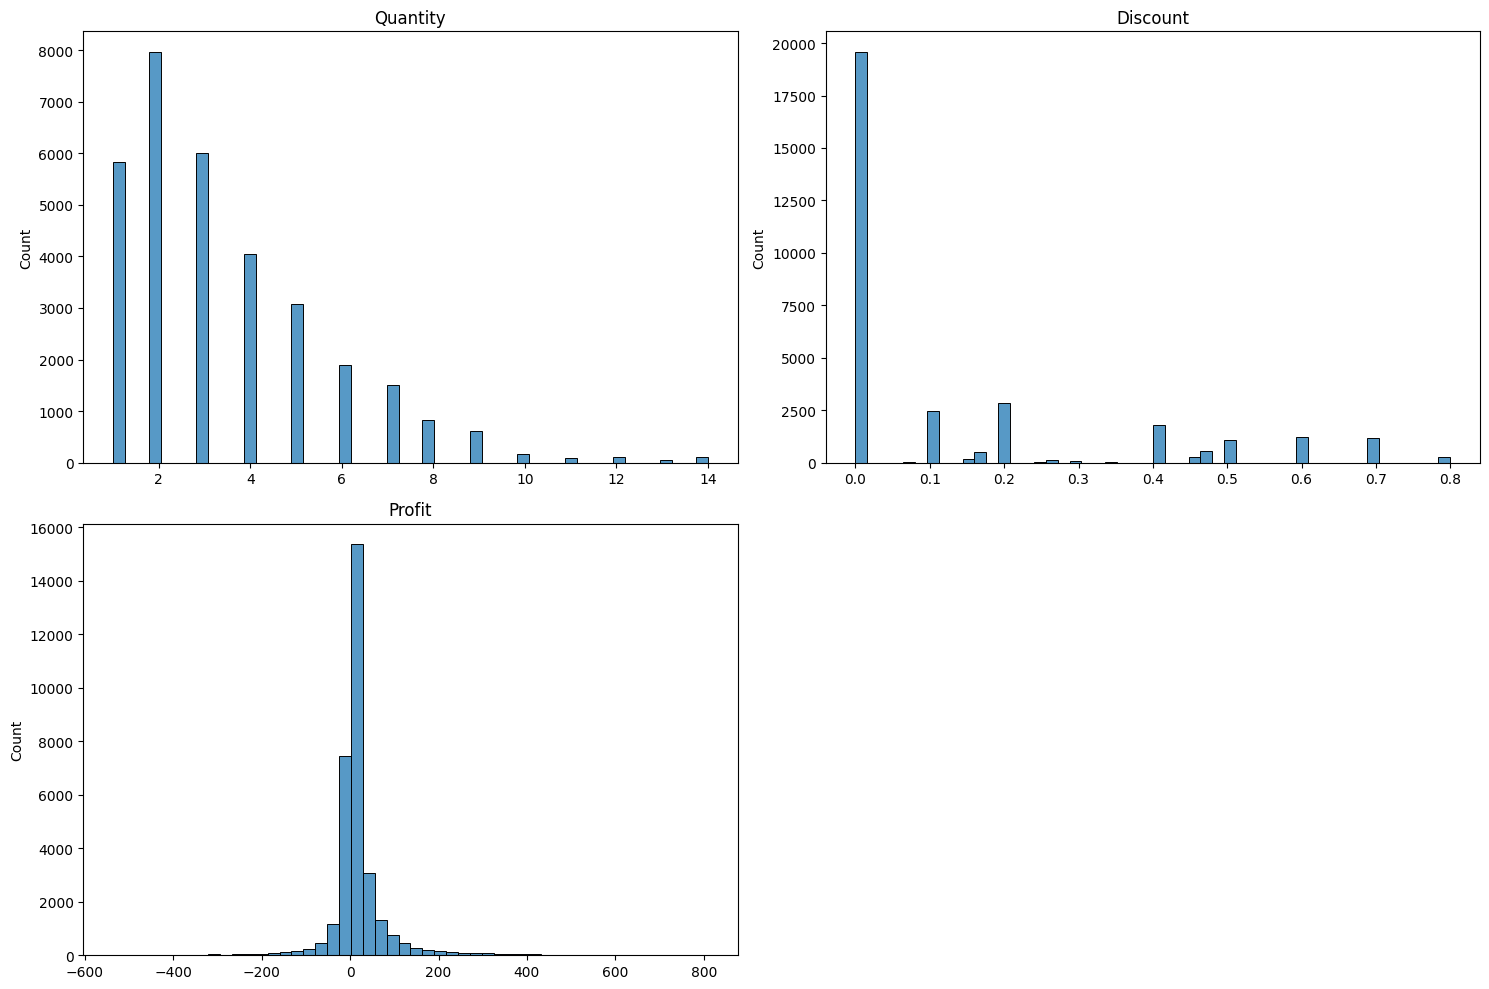

In [12]:
sp.plot_numericas(df_num)

- El plot de las columnas numéricas nos puede ayudar a comprobar si se comportan como categóricas, y comprobar si son normales. En el caso de cantidad, vemos que es continua, y no es normal. El beneficio, por su parte, parece ser normal. Los descuentos, a pesar de no ser continuos, tenemos 26 valores distintos, así que la mantendremos como numérica.

- Vamos a analizar ahora las variables categóricas.

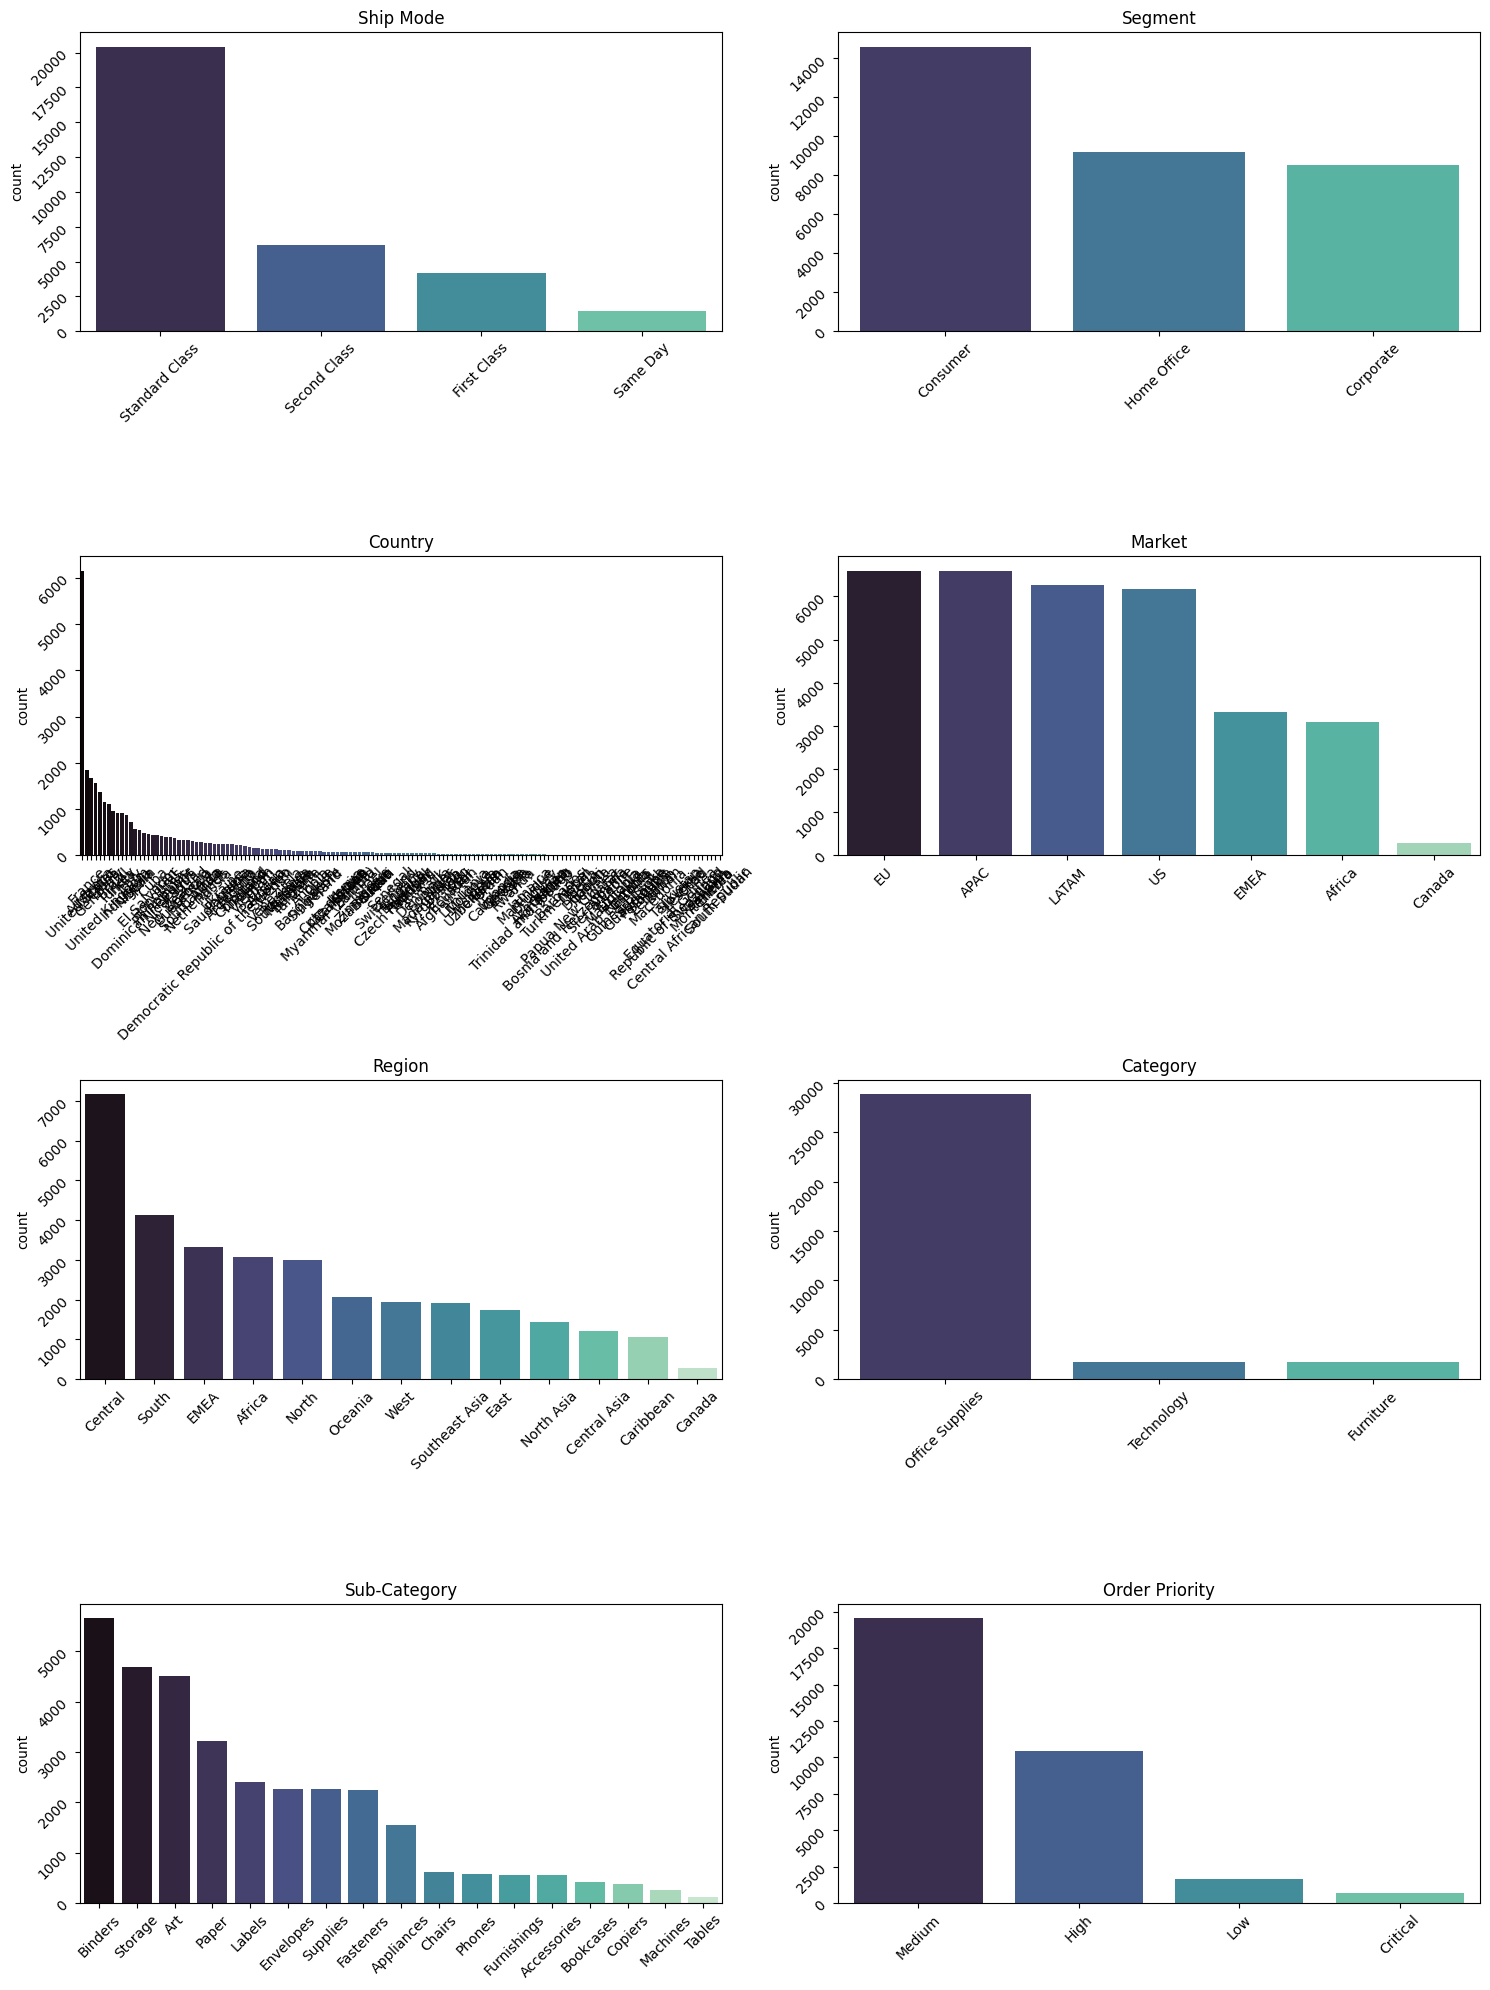

In [13]:
sp.plot_cat(df_cat, tamano_grafica=(15,20))

In [14]:
print(f'EEUU: {round(df[df["Country"] == "United States"].shape[0]/df.shape[0]*100)}%')
print(f'Suministros oficina: {round(df[df["Category"] == "Office Supplies"].shape[0]/df.shape[0]*100)}%')
print(f'Prioridad low: {round(df[df["Order Priority"] == "Low"].shape[0]/df.shape[0]*100)}%')

EEUU: 19%
Suministros oficina: 89%
Prioridad low: 5%


- Para las features identificadas como categóricas, podemos ver que, hay distribuciones poco equilibradas para la mayoría de las categorías. En los países, por ejemplo, Estados Unidos representa un 19% del total, cuando hay países con un único registro.

- En las categorías de producto, los suministros de oficina sólamente representan un 89% (el 11 restante se encuentra en el primer cluster) del total. Sabemos que, esta ctagoría genera un 35% de los beneficios totales.

- En la prioridad de los pedidos, la categoría "baja" se encuentra sólamente en el 5% de los datos.

- Analizaremos ahora la relación de la variable respuesta con las variables categóricas:

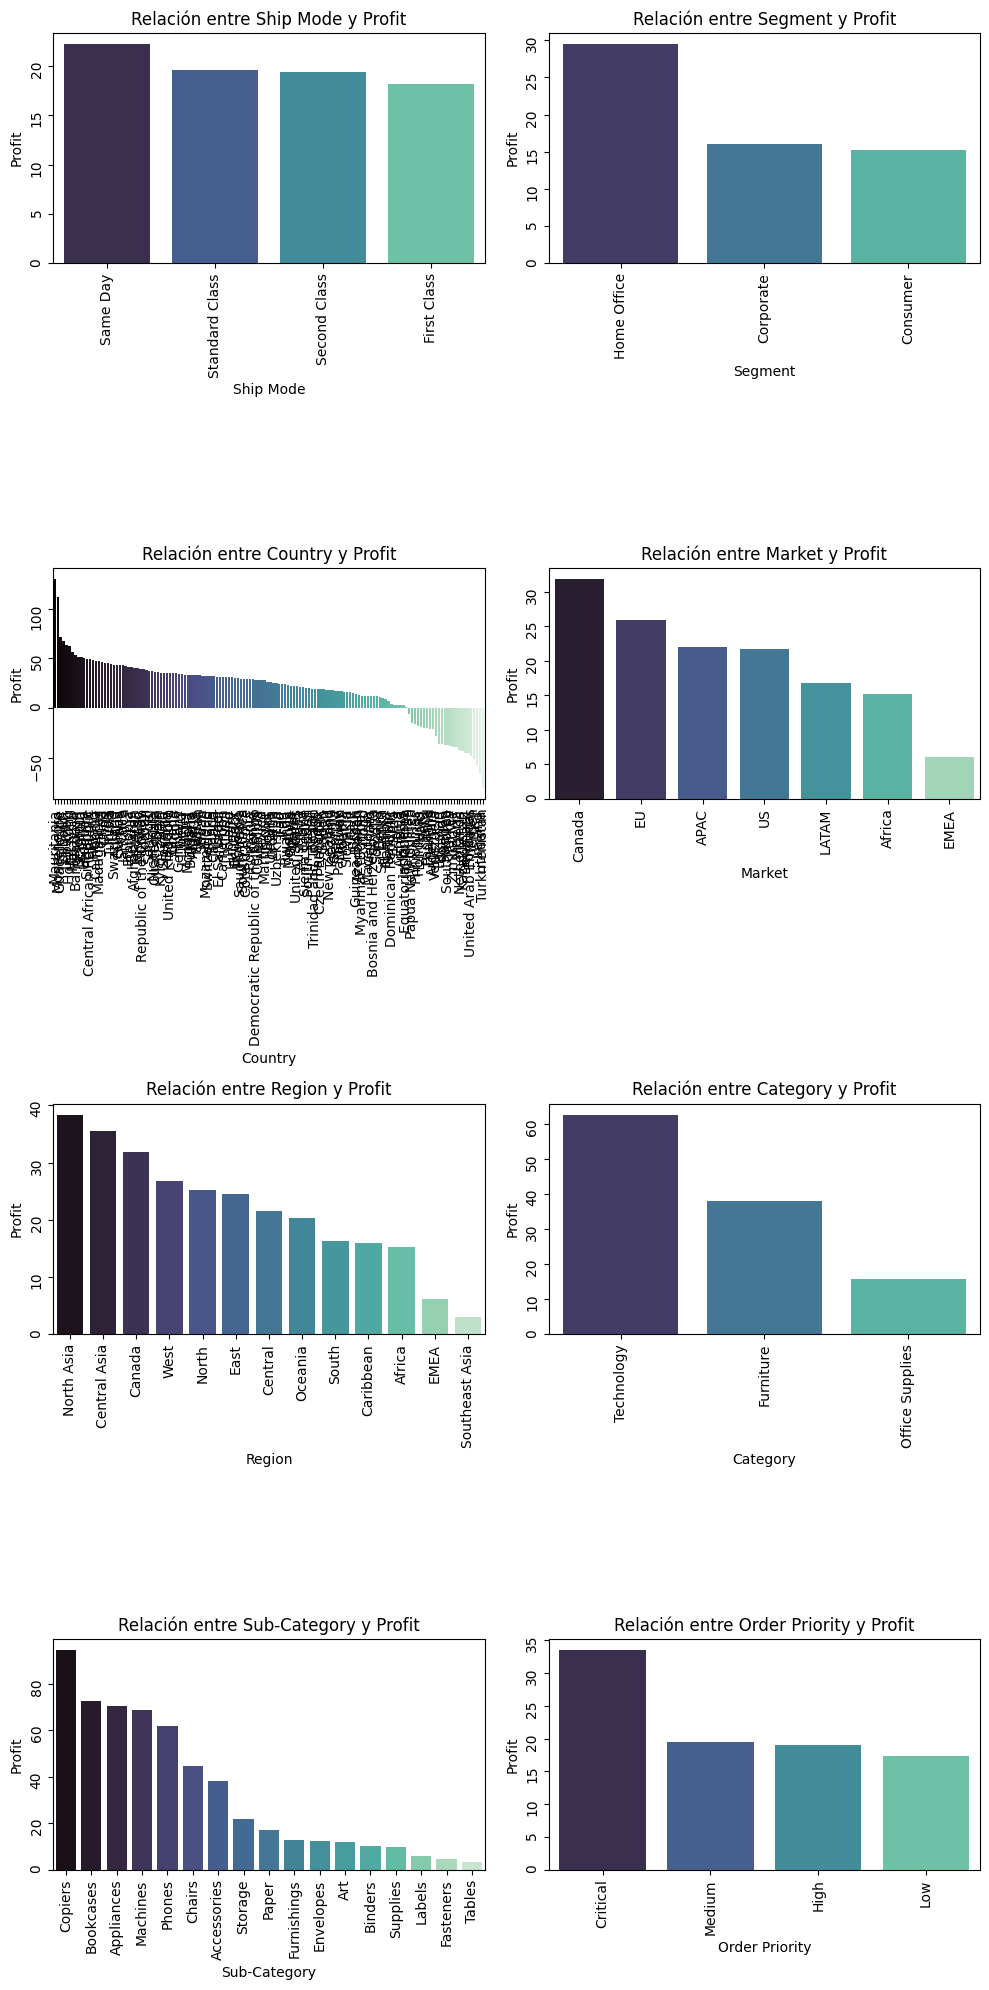

In [15]:
sp.relacion_vs_cat(df, "Profit", tamano_grafica=(10,20))

- De esta gráfica, podemos sacar muchas conclusiones valiosas:
    - Hay un grupo de países que claramente generan pérdidas a la empresa, lo mismo que con la subcategoría de mesas.
    - En lo que respecta al ship mode, el tipo de envío guarda poca relación directa con el beneficio, ocurre lo mismo con la prioridad, aunque en este caso, sorprende que, contrario al cluster 0, aquellos con prioridad crítica, generan un mayor beneficio.
    - Asia (norte y central) es la región más rentable.
    - Aunque Canadá es el mercado con menores ventas, es el que mejores beneficios reporta, igual que en cluster 0.
    - La categoría más rentable es la de tecnología, seguida por los muebles.
    - Las subcategorías más rentables son las fotocopiadoras, las estanterías para libros y los electrodomésticos.

- Veamos ahora la relación de las features numéricas:

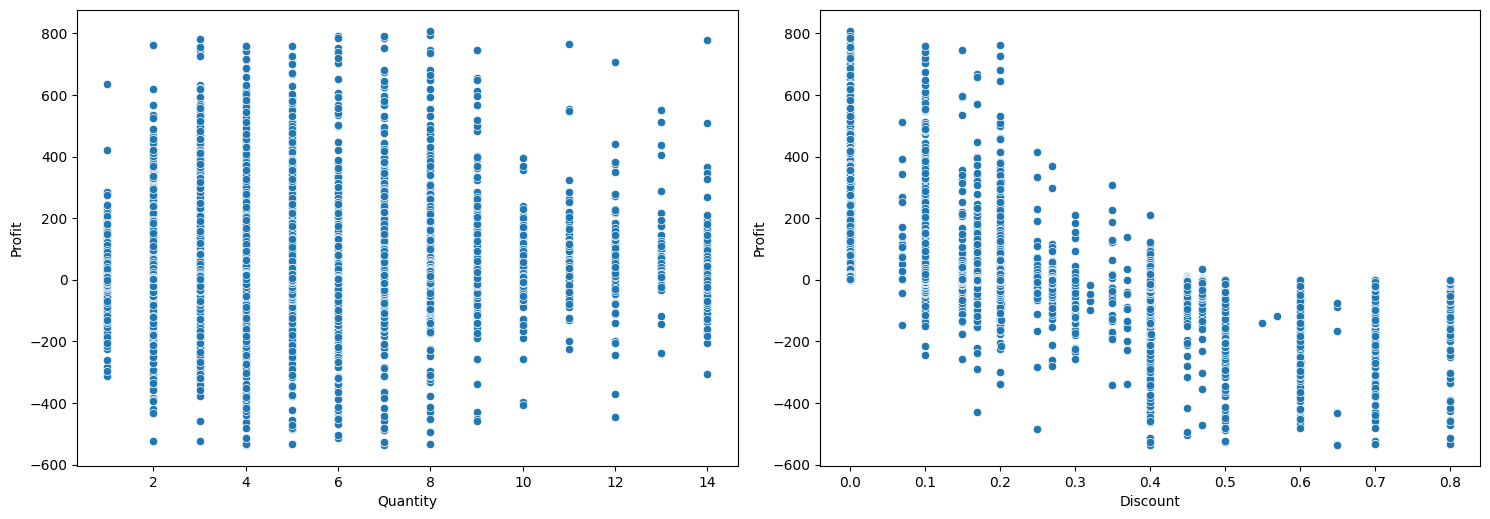

In [16]:
sp.relacion_vs_numericas(df, "Profit")

- De esta gráfica, podemos obtener insights claros para cada variable:
    - **Cantidad:** hasta 11 unidades no suele ser determinante del margen, aunque aquellos pedidos con una única unidad reportan beneficios mucho más pequeños. A partir de 10, en general, es menos probable tener pérdidas, aunque también, los beneficios suelen ser menores.
    - **Descuento:** hay una tendencia muy clara: a mayor descuento, mayor probabilidad de pérdidas. Con 0% de descuento, no hay pérdidas. Casi todos los pedidos con descuentos superiores al 50% generan pérdidas para la empresa. 

- Analicemos ahora la matriz de correlación:

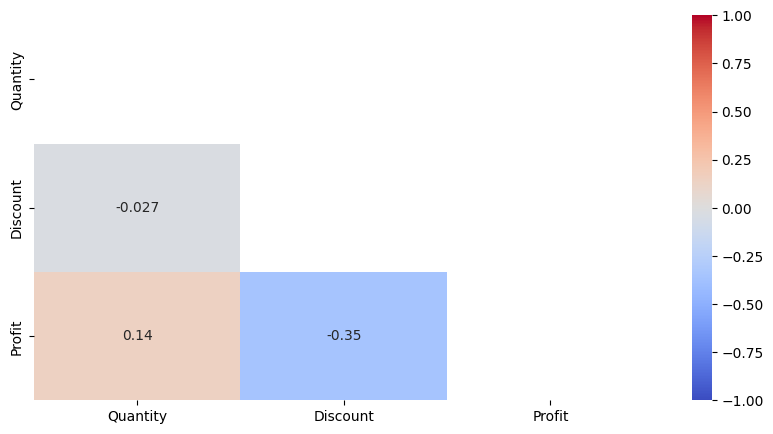

In [17]:
sp.matriz_correlacion(df)

- Identificamos una correlación alta cuando es mayor a 0.6. Nuestra matriz confirma los hallazgos de la gráfica de dispersión anterior. Las relación más fuerte la vemos entre el descuento y el beneficio, que, como hemos visto, a partir de determinado punto (aproximadamente 45%), afecta negativamente los beneficios.

- En una gráfica de correlación, cuando hay dos variables con una relación muy fuerte, nos podemos plantear eliminar una de ellas, por aportar información redudante. En este caso, no tenemos esa situación, así que mantendremos las dos variables numéricas que tenemos.

- Revisaremos ahora los outliers. 

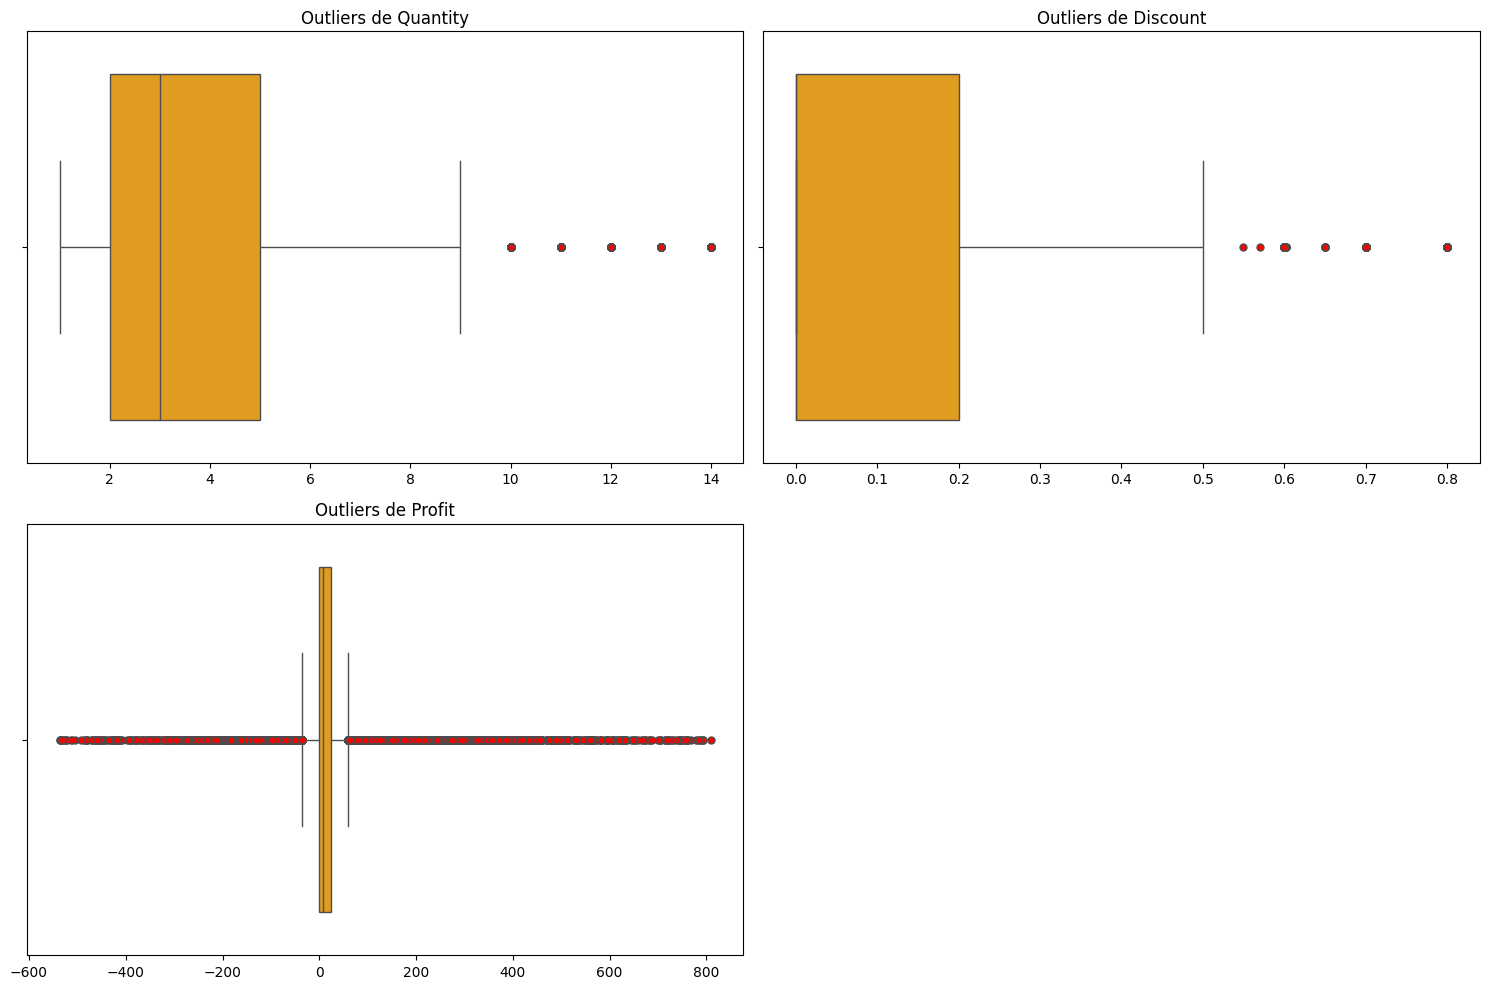

In [18]:
sp.detectar_outliers(df)

- En la gráfica somos capaces de identificar outliers en todas las variables numéricas. En el caso de cantidad y descuento, tenemos pocos, pero que se encuentran dentro de los márgenes de cada variable. El beneficio, por su parte, siento una feature muy variable, tiene una gran cantidad de outliers. Los veremos en el próximo notebook.

- Finaliza el EDA guardando el DF sin nulos.

In [19]:
with open('../../../../datos/cluster1/modelo1/df_sinnulos.pkl', 'wb') as f:
    pickle.dump(df, f)